In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/glaucoma_dataset.csv')

In [4]:
df.head(5)

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


- 결측치를 확인한다.
- 데이터 타입을 확인한다. 
- 데이터의 크기를 확인한다.
- 컬럼의 크기를 확인한다.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

# info에서 결측치 존재하는건 대략 
#### Medical History  가지고있는 질병 
##### ['Diabetes' 'Hypertension' nan 'Glaucoma in family']
#### Medication Usage 약물 뭐썼는지 ,약물사용
### 이 두가지 칼럼으로 보인다 실제로 밑에 널값 확인해보면 퍼센트 존재하는게 두 칼럼이다

In [30]:
# 컬럼별 널값 확인
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

column: Patient ID	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 0.00%
column:     Gender	 Percent of NaN value: 0.00%
column: Visual Acuity Measurements	 Percent of NaN value: 0.00%
column: Intraocular Pressure (IOP)	 Percent of NaN value: 0.00%
column: Cup-to-Disc Ratio (CDR)	 Percent of NaN value: 0.00%
column: Family History	 Percent of NaN value: 0.00%
column: Medical History	 Percent of NaN value: 25.47%
column: Medication Usage	 Percent of NaN value: 12.31%
column: Visual Field Test Results	 Percent of NaN value: 0.00%
column: Optical Coherence Tomography (OCT) Results	 Percent of NaN value: 0.00%
column: Pachymetry	 Percent of NaN value: 0.00%
column: Cataract Status	 Percent of NaN value: 0.00%
column: Angle Closure Status	 Percent of NaN value: 0.00%
column: Visual Symptoms	 Percent of NaN value: 0.00%
column:  Diagnosis	 Percent of NaN value: 0.00%
column: Glaucoma Type	 Percent of NaN value: 0.00%


<Axes: >

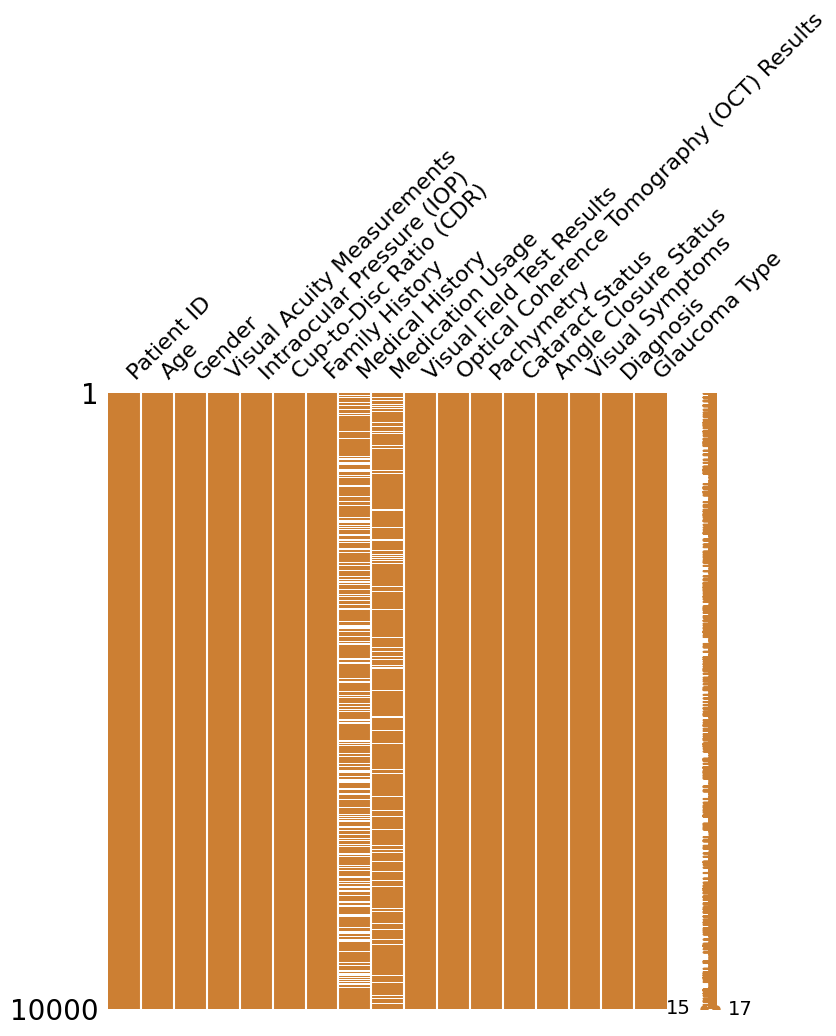

In [5]:
# 결측치의 분포를 확인
msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [24]:
df.describe()

,Patient ID,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50002.16880,53.872200,17.507527,0.548437,549.733974
std,28939.82498,21.127563,4.356101,0.144326,28.902741
min,4.00000,18.000000,10.000000,0.300000,500.010000
25%,24660.25000,36.000000,13.760000,0.420000,524.590000
50%,50091.50000,54.000000,17.485000,0.550000,549.335000
75%,74829.25000,72.000000,21.300000,0.670000,574.972500
max,99992.00000,90.000000,25.000000,0.800000,599.990000


# 결측치 채우기 아이디어

#### Medical History 가지고있는 질병 ['Diabetes' 'Hypertension' nan 'Glaucoma in family']
#### Medication Usage 약물 뭐썼는지 ,약물사용
결측치가 의료기록에 널값이 존재한다. 근데 
####  Family History로 Glaucoma in family 이거 대체 가능하지 않을까?
--> 이유 : 어차피 가지고 있는 질병 특성에 가족력이란 항목이 존재한다
근데 Family History란 가족력 항목이 추가로 존재해? 이건 그냥 이거 사용해서 채우라고 놔둔거다.(뇌피셜)

--> 물론 이런 경우 (이전 기록이 없거나) 개인정보 이슈로 결측치가 존재할 수 있다.

--> 방법 : 
Family History 라는 칼럼하고 비교해서 만약 Medical History 항목에서
결측치가 존재하면 같은 행의 Family History 값을 [yes, no] 을 확인해보고
yes면 'Glaucoma in family'로 채울꺼고 no면 'Glaucoma not in family'로 채움


***데이터를 계속 들여다보니 Medical Usage를 통해 채우는 방법도 존재한다. 근데 나는 이방법을 택하였음-정서익***

In [18]:
# 결측치를 Family History에 따라 채우기
df['Medical History'] = np.where((df['Medical History'].isna()) & (df['Family History'] == 'yes'), 'Glaucoma in family',
                                 np.where((df['Medical History'].isna()) & (df['Family History'] == 'no'), 'Glaucoma not in family', df['Medical History']))


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             10000 non-null  object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

# 2. Medication Usage 는 어떻게 채울까
## 값들이 뭐가 대충 들었는지 확인해보자


In [23]:
for colums in df.columns:
    uniq = df[colums].unique()
    print(f"{colums}의 값", uniq)
    print("---")


Patient ID의 값 [62431 68125 63329 ... 67810 34285 85320]
---
Age의 값 [69 67 23 21 88 46 66 60 29 61 74 53 76 73 24 49 54 80 19 41 63 65 85 43
 62 40 30 38 26 22 71 35 86 68 32 59 27 78 34 83 89 45 87 47 44 37 70 77
 18 81 57 28 20 84 90 56 25 58 79 50 75 42 55 72 51 39 33 64 48 31 52 36
 82]
---
Gender의 값 ['Male' 'Female']
---
Visual Acuity Measurements의 값 ['LogMAR 0.1' '20/40' 'LogMAR 0.0' '20/20']
---
Intraocular Pressure (IOP)의 값 [19.46 18.39 23.65 ... 12.3  16.1  15.45]
---
Cup-to-Disc Ratio (CDR)의 값 [0.42 0.72 0.61 0.3  0.58 0.39 0.46 0.52 0.37 0.71 0.55 0.41 0.69 0.43
 0.47 0.38 0.33 0.75 0.54 0.68 0.48 0.65 0.64 0.7  0.36 0.6  0.57 0.49
 0.51 0.74 0.34 0.35 0.4  0.78 0.77 0.56 0.62 0.67 0.53 0.66 0.63 0.59
 0.73 0.32 0.76 0.44 0.8  0.45 0.5  0.79 0.31]
---
Family History의 값 ['No' 'Yes']
---
Medical History의 값 ['Diabetes' 'Hypertension' 'Glaucoma not in family' 'Glaucoma in family']
---
Medication Usage의 값 ['Amoxicillin, Lisinopril, Omeprazole, Atorvastatin, Ibuprofen, Aspirin, Met

**뭔지 전혀 모르겠다 하나만 보자**

In [24]:
df['Medication Usage'].unique()

array(['Amoxicillin, Lisinopril, Omeprazole, Atorvastatin, Ibuprofen, Aspirin, Metformin',
       'Lisinopril, Amoxicillin, Atorvastatin, Ibuprofen, Omeprazole',
       'Amoxicillin, Ibuprofen, Metformin, Atorvastatin, Aspirin, Lisinopril',
       ...,
       'Ibuprofen, Atorvastatin, Aspirin, Metformin, Omeprazole, Lisinopril, Amoxicillin',
       'Aspirin, Omeprazole, Lisinopril, Atorvastatin, Ibuprofen, Amoxicillin',
       'Ibuprofen, Omeprazole, Atorvastatin, Lisinopril, Metformin, Aspirin, Amoxicillin'],
      dtype=object)

##### 나에겐 너무 어려운 약들 명칭이다.
--> 하지만 이걸 이용해서 결측치를 채울거다.

--> 아이디어는 다음과 같다.
1. 각 행마다 평균적으로 적혀있는 약물 갯수를 산정한다.
2. 이제 Medical History 칼럼을 들여다본다 
Medical Usage 여기서 가장 자주 등장하는 약물 개수 탑 4개를 Medical History와 맵핑해보며 산정한다.
3. Medical History 해당 증상이 존재할 경우 and 결측치가 있을경우 면 탑 4 약물을 채워넣는다.

***생각해보니 이 방식으로 Medical History를 채우는것도 가능할 듯하다.***

In [26]:

# 각 행별로 약물의 개수를 계산하여 새로운 열에 추가
df['Number of Medications'] = df['Medication Usage'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

# 약물의 개수 평균 계산
average_medications = df['Number of Medications'].mean()

print("각 행별 약물 개수:\n", df[['Medication Usage', 'Number of Medications']])
print("\n약물 개수 평균:", average_medications)

각 행별 약물 개수:
                                        Medication Usage  Number of Medications
0     Amoxicillin, Lisinopril, Omeprazole, Atorvasta...                      7
1     Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...                      5
2     Amoxicillin, Ibuprofen, Metformin, Atorvastati...                      6
3                                    Ibuprofen, Aspirin                      2
4     Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...                      5
...                                                 ...                    ...
9995                                                NaN                      0
9996                                         Lisinopril                      1
9997                                          Ibuprofen                      1
9998                                                NaN                      0
9999                 Lisinopril, Ibuprofen, Amoxicillin                      3

[10000 rows x 2 columns]

약물 개수 평균: 3.

3.5다 평균값은 반올림해서 4라고 치자

### 아이디어를 정리해보면

Medical History 칼럼 데이터를 이용해서 ['Medication Usage'] 의 결측치를 채움

방법은 Medical History 칼럼  데이터 ['Diabetes' 'Hypertension' 'Glaucoma not in family' 'Glaucoma in family'] 를 이용

예를 들어 'Diabetes' 라는 값을 가진 행 전부를 확인 

여기서 가장 많이 등장하는 약물 단어가 뭔지 상위 4개를 선정

그거를 가지고 결측치를 채움 된다.

다시 예를 들어
만약 ['Medication Usage']에 결측치가 존재하고 Diabetes라는 속성값을 가지고 있다면 거기다가 Diabetes라는 값을 가진 것 중 상위 약물단어 4개를 ','으로 동일하게 채워넣음 끝

### 이걸 코드로 다시 작성해보자



In [30]:
from collections import Counter

# 모든 'Medical History' 값에 대해 약물 단어 추출 및 빈도수 계산
all_medications_dict = {}
for medical_history_value in df['Medical History'].unique():
    rows = df[df['Medical History'] == medical_history_value]
    if not pd.isna(medical_history_value):
        all_medications = ', '.join(rows['Medication Usage'].dropna().tolist()).split(', ')
        all_medications_dict[medical_history_value] = [medication for medication, count in Counter(all_medications).most_common(4)]

# 결측치를 채우는 함수 정의
def fill_missing(row):
    medical_history_value = row['Medical History']
    if pd.isna(row['Medication Usage']) and medical_history_value in all_medications_dict:
        return ', '.join(all_medications_dict[medical_history_value])
    else:
        return row['Medication Usage']

# 결측치 채우기
df['Medication Usage'] = df.apply(fill_missing, axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             10000 non-null  object 
 8   Medication Usage                            10000 non-null  object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

# 완료
--> 결측치 채우기 귀찮은데 그냥 없애는건? 

--> 합당한 이유가 있어야함

--> 없으면 무조건 채우는게 좋다, 강사님 말씀

--> 채우는 방법도 합당한 이유가 존재해야함

# 생각보다 Object데이터가 많다. 이걸 어떻게 처리해볼까?

## 아이디어
1. 가족력이나 특정 질병에 가중치를 준다.
2. 그냥 object를 인코딩해버린다.
3. 자연어처리한다(모름)

In [13]:

# 'Family History'가 'Yes'인 경우의 행만 필터링
yes_family_history_df = df[df['Family History'] == 'Yes']

# 'Diagnosis'가 'Glaucoma'인 경우의 행만 필터링
glaucoma_df = yes_family_history_df[yes_family_history_df['Diagnosis'] == 'Glaucoma']

# 'Family History'가 'Yes'이고 'Diagnosis'가 'Glaucoma'인 비율 계산
glaucoma_ratio = len(glaucoma_df) / len(yes_family_history_df)

print("Family History가 Yes일 때 Glaucoma 비율:", glaucoma_ratio)


Family History가 Yes일 때 Glaucoma 비율: 0.4970854271356784


아 가족력 상관없이 그냥 비율이 50퍼구나 딱히 영향을 주는 인자라고 볼 수 없다.

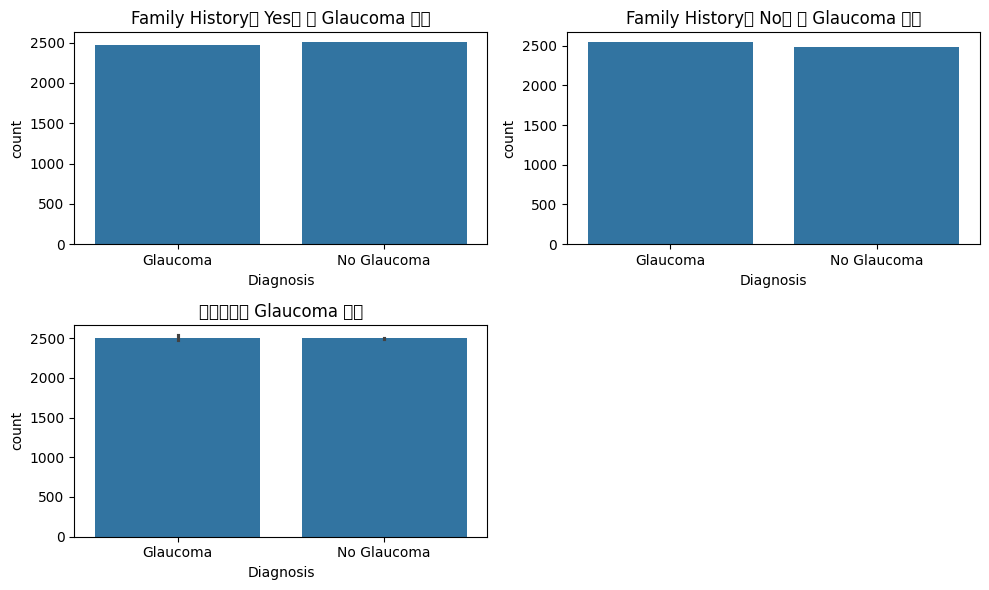

## Patient ID
- 해당 변수에 대한 결측치 확인을 한다.
- 해당 변수에 대한 중복값을 확인한다
- 변수의 특성을 파악한다.

#### Patient ID 변수는 중복값이 없이 모두 다른 값을 가지고 있으므로 인덱스와 같은 데이터로 생각하면 될 것 같습니다. 

In [19]:
# 결측치 확인
df['Patient ID'].isna().sum()

0

In [21]:
# 중복값 확인
df['Patient ID'].duplicated().sum()

0

## Age
- 해당 변수에 대한 결측치 확인을 한다.
- 변수의 특성을 파악한다.

#### 나이의 분포에 특이점이 있다. 
- 나이별 분포가 균일하다.
- 확진자의 나이 분포와 비확진자의 나이분포가 같다.

#### 결론
- 데이터를 인위적으로 customizing 한듯하다.


In [23]:
# 결측치 확인
df['Age'].isna().sum()

0

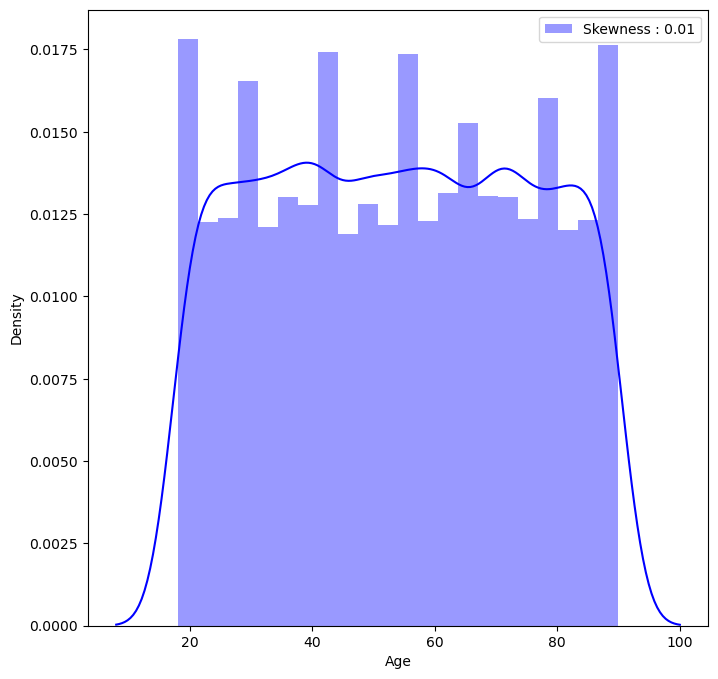

In [41]:
# 중복값 확인
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df['Age'], color='b', label='Skewness : {:.2f}'.format(df['Age'].skew()), ax=ax)
g = g.legend(loc='best')

In [43]:
print('제일 나이 많은 환자 : {:.1f} Years'.format(df['Age'].max()))
print('제일 어린 환자 : {:.1f} Years'.format(df['Age'].min()))
print('환자 평균 나이 : {:.1f} Years'.format(df['Age'].mean()))

제일 나이 많은 환자 : 90.0 Years
제일 어린 환자 : 18.0 Years
환자 평균 나이 : 53.9 Years


In [74]:
print('확진자 중에 제일 나이 많은 환자 : {:.1f} Years'.format(df[df['Diagnosis'] != 'No']['Age'].max()))
print('확진자 중에 제일 어린 환자 : {:.1f} Years'.format(df[df['Diagnosis'] != 'No']['Age'].min()))
print('확진자 중에 환자 평균 나이 : {:.1f} Years'.format(df[df['Diagnosis'] != 'No']['Age'].mean()))

확진자 중에 제일 나이 많은 환자 : 90.0 Years
확진자 중에 제일 어린 환자 : 18.0 Years
확진자 중에 환자 평균 나이 : 53.9 Years


- Age 컬럼의 확진자의 나이 분포와 비확진자의 나이 분포가 같다. 

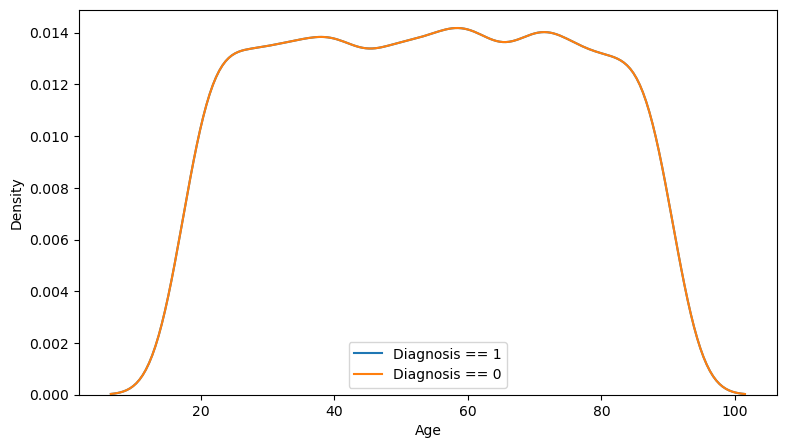

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Diagnosis'] == 'Glaucoma']['Age'], ax=ax)
sns.kdeplot(df[df['Diagnosis'] == 'Glaucoma']['Age'], ax=ax)
plt.legend(['Diagnosis == 1', 'Diagnosis == 0'])
plt.show()

## Gender
- 해당 변수에 대한 결측치 확인을 한다.
- 변수의 분포를 확인한다.
- 변수의 특성을 파악한다.

#### 특이사항
- 남자 여자의 데이터 비율이 약 50%로 비슷함
- 확진자 별 성별의 비율도 비슷함
- 성별은 특징으로 효력이 없을 수도??


Text(0.5, 1.0, 'Count plot - Gender')

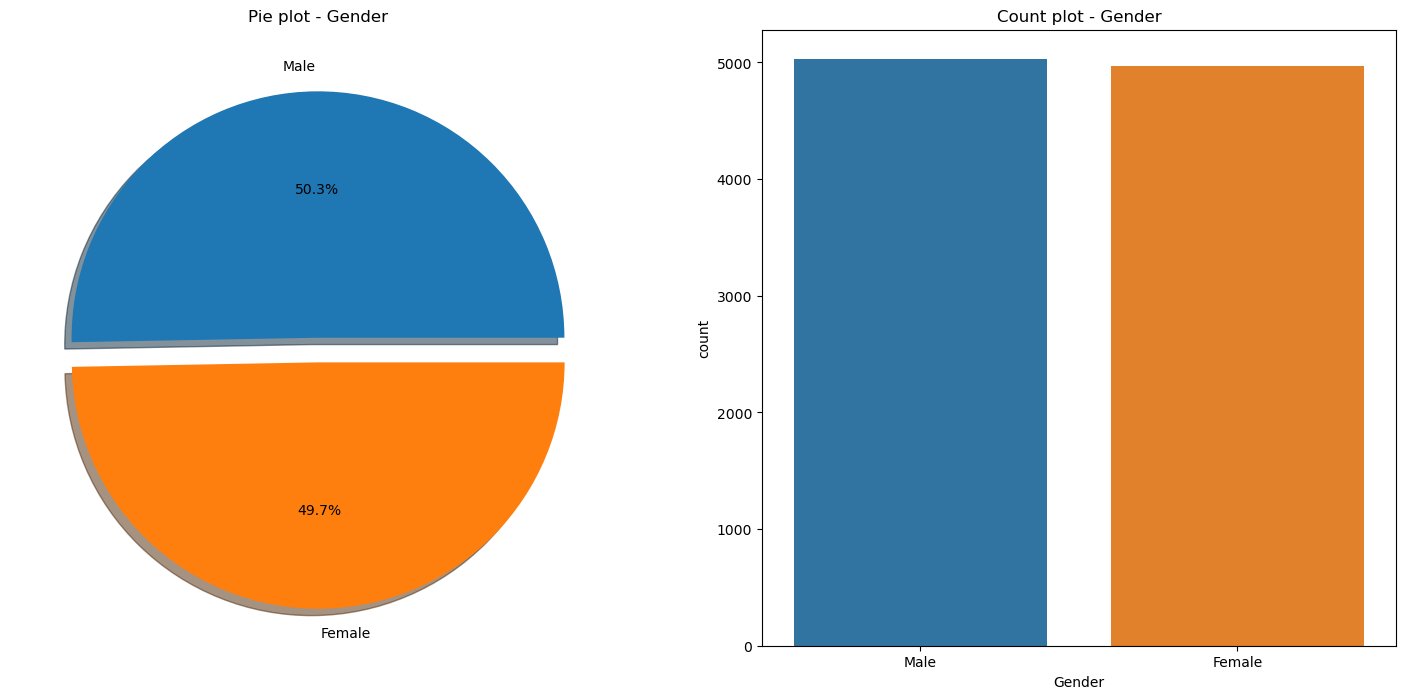

In [90]:
# 성별의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Gender')
ax[0].set_ylabel('')

sns.countplot(x='Gender', data=df, ax=ax[1])
ax[1].set_title('Count plot - Gender')

In [106]:
df[df['Diagnosis']=='Glaucoma'].groupby('Gender').count()

,Patient ID,Age,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
Gender,,,,,,,,,,,,,,,,
Female,2466,2466,2466,2466,2466,2466,1833,2165,2466,2466,2466,2466,2466,2466,2466,2466
Male,2546,2546,2546,2546,2546,2546,1885,2217,2546,2546,2546,2546,2546,2546,2546,2546


In [108]:
# 확진자별 남여 성비 
pd.crosstab(df['Diagnosis'], df['Gender'], margins=True)

Gender,Female,Male,All
Diagnosis,,,
Glaucoma,2466,2546,5012
No Glaucoma,2505,2483,4988
All,4971,5029,10000
